In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
train_df = pd.read_csv('../nlp-getting-started/train.csv')
test_df = pd.read_csv('../nlp-getting-started/test.csv')

In [15]:
train_df.head()
train_df.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Methodology 

- data exploration
- things to get in mind to separate (feature creation):
    - locations
    - hashtags 
    - locations in text
    - keywords in text 

- evaluate relations between this variables
- evaluate baseline algorithms
- evalutate machine learning algorithms (random forest, xgboost)

## 1. Data Exploration

In [32]:
#create keyword and location flags
train_df['keyword_flg'] = ''
train_df.loc[~train_df['keyword'].isna(),'keyword_flg'] =1
train_df.loc[train_df['keyword'].isna(),'keyword_flg'] =0

train_df['location_flg'] = ''
train_df.loc[~train_df['location'].isna(),'location_flg'] =1
train_df.loc[train_df['location'].isna(),'location_flg'] =0

/Users/gonzalosanchez/Documents/Data science/Kaggle/Competitions/NLP with Disaster Tweets/testenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='keyword_flg', ylabel='count'>

Text(0.5, 1.0, 'keyword vs target')

/Users/gonzalosanchez/Documents/Data science/Kaggle/Competitions/NLP with Disaster Tweets/testenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_flg', ylabel='count'>

Text(0.5, 1.0, 'location vs target')

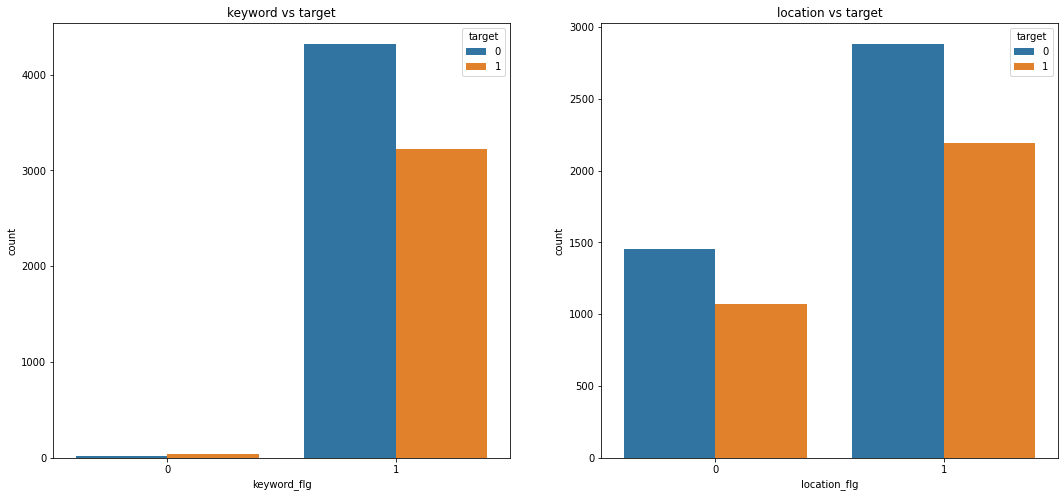

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# train_df[['keyword_flg', 'target']].groupby(['keyword_flg']).count().plot.bar(ax=ax[0])
sns.countplot('keyword_flg', hue='target', data=train_df, ax=ax[0])
ax[0].set_title('keyword vs target')
sns.countplot('location_flg', hue='target', data=train_df, ax=ax[1])
ax[1].set_title('location vs target')
plt.show()

```location_flg``` dont tell anything aparently, but ```keyword_flg``` seems to be something

In [27]:
train_df['text'][0].lower()

'our deeds are the reason of this #earthquake may allah forgive us all'